## Lesson 3: Visualizing Embeddings

In [33]:
import sys
!{sys.executable} -m pip install --upgrade matplotlib
!{sys.executable} -m pip install --upgrade mplcursors
!{sys.executable} -m pip install --upgrade ipympl
!{sys.executable} -m pip install --upgrade seaborn



[notice] A new release of pip is available: 23.2.1 -> 23.3
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.2.1 -> 23.3
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.2.1 -> 23.3
[notice] To update, run: pip install --upgrade pip
  Obtaining dependency information for seaborn from https://files.pythonhosted.org/packages/7b/e5/83fcd7e9db036c179e0352bfcd20f81d728197a16f883e7b90307a88e65e/seaborn-0.13.0-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 1.6 MB/s eta 0:00:00a 0:00:01m

[notice] A new release of pip is available: 23.2.1 -> 23.3
[notice] To update, run: pip install --upgrade pip


#### Project environment setup

- Load credentials and relevant Python Libraries

In [2]:
"""
#from utils import authenticate
#credentials, PROJECT_ID = authenticate() #Get credentials and project ID

!gcloud auth application-default login
"""

'\n#from utils import authenticate\n#credentials, PROJECT_ID = authenticate() #Get credentials and project ID\n\n!gcloud auth application-default login\n'

In [3]:
"""
import os
PROJECT_ID = "seismic-bucksaw-396319"
#credentials = "/Users/ytchen/.config/gcloud/application_default_credentials.json"
os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = "/Users/ytchen/.config/gcloud/application_default_credentials.json"
"""

'\nimport os\nPROJECT_ID = "seismic-bucksaw-396319"\n#credentials = "/Users/ytchen/.config/gcloud/application_default_credentials.json"\nos.environ["GOOGLE_APPLICATION_CREDENTIALS"] = "/Users/ytchen/.config/gcloud/application_default_credentials.json"\n'

In [4]:
"""
#from google.oauth2 import service_account
#credentials = service_account.Credentials.from_service_account_file('/Users/ytchen/.config/gcloud/application_default_credentials.json')
"""

"\n#from google.oauth2 import service_account\n#credentials = service_account.Credentials.from_service_account_file('/Users/ytchen/.config/gcloud/application_default_credentials.json')\n"

In [5]:
"""
REGION = 'us-central1'
"""

"\nREGION = 'us-central1'\n"

#### Enter project details

In [6]:
"""
# Import and initialize the Vertex AI Python SDK

import vertexai
vertexai.init(project=PROJECT_ID, 
              location=REGION, 
              credentials = credentials)
"""

'\n# Import and initialize the Vertex AI Python SDK\n\nimport vertexai\nvertexai.init(project=PROJECT_ID, \n              location=REGION, \n              credentials = credentials)\n'

In [7]:
import google.generativeai as palm
import os
import pprint
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

palm.configure(api_key=os.environ['API_KEY'])


/Users/ytchen/Documents/experimental/env11/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Embeddings capture meaning

In [8]:
in_1 = "Missing flamingo discovered at swimming pool"

in_2 = "Sea otter spotted on surfboard by beach"

in_3 = "Baby panda enjoys boat ride"


in_4 = "Breakfast themed food truck beloved by all!"

in_5 = "New curry restaurant aims to please!"


in_6 = "Python developers are wonderful people"

in_7 = "TypeScript, C++ or Java? All are great!" 


input_text_lst_news = [in_1, in_2, in_3, in_4, in_5, in_6, in_7]


In [9]:
"""
import numpy as np
from vertexai.language_models import TextEmbeddingModel

embedding_model = TextEmbeddingModel.from_pretrained(
    "textembedding-gecko@001")
"""

'\nimport numpy as np\nfrom vertexai.language_models import TextEmbeddingModel\n\nembedding_model = TextEmbeddingModel.from_pretrained(\n    "textembedding-gecko@001")\n'

- Get embeddings for all pieces of text.
- Store them in a 2D NumPy array (one row for each embedding).

In [10]:
for model in palm.list_models():
  if 'embedText' in model.supported_generation_methods:
    print(model.name)

model = "models/embedding-gecko-001"


models/embedding-gecko-001


In [11]:
embeddings = []
for input_text in input_text_lst_news:
    #emb = embedding_model.get_embeddings(
    #    [input_text])[0].values
    #embeddings.append(emb)
    emb = palm.generate_embeddings(model=model, text=input_text)
    embeddings.append(emb['embedding'])
    
embeddings_array = np.array(embeddings) 


In [12]:
print("Shape: " + str(embeddings_array.shape))
print(embeddings_array)


Shape: (7, 768)
[[ 0.04556028 -0.01480586 -0.02939345 ...  0.04024202 -0.03183486
  -0.0194526 ]
 [-0.01969983  0.00047666  0.01173128 ...  0.02620934 -0.03975069
  -0.02035736]
 [ 0.01047403  0.02200534  0.02471215 ...  0.03534115 -0.02754833
  -0.04188428]
 ...
 [-0.02609528 -0.01762322 -0.01265693 ... -0.01375482  0.00068412
   0.01597161]
 [-0.00564666 -0.02183738 -0.03264149 ... -0.02808249 -0.03357179
  -0.01542098]
 [ 0.00874097 -0.01325074  0.04265676 ... -0.04260212  0.01807768
   0.01115375]]


#### Reduce embeddings from 768 to 2 dimensions for visualization
- We'll use principal component analysis (PCA).
- You can learn more about PCA in [this video](https://www.coursera.org/learn/unsupervised-learning-recommenders-reinforcement-learning/lecture/73zWO/reducing-the-number-of-features-optional) from the Machine Learning Specialization. 

In [13]:
from sklearn.decomposition import PCA

# Perform PCA for 2D visualization
PCA_model = PCA(n_components = 2)
PCA_model.fit(embeddings_array)
new_values = PCA_model.transform(embeddings_array)


In [14]:
print("Shape: " + str(new_values.shape))
print(new_values)


Shape: (7, 2)
[[-0.41032419 -0.10108343]
 [-0.39429429 -0.18556829]
 [-0.2997586   0.07400163]
 [ 0.15990356  0.32946907]
 [ 0.18770757  0.4855306 ]
 [ 0.3150961  -0.23508619]
 [ 0.44166985 -0.3672634 ]]


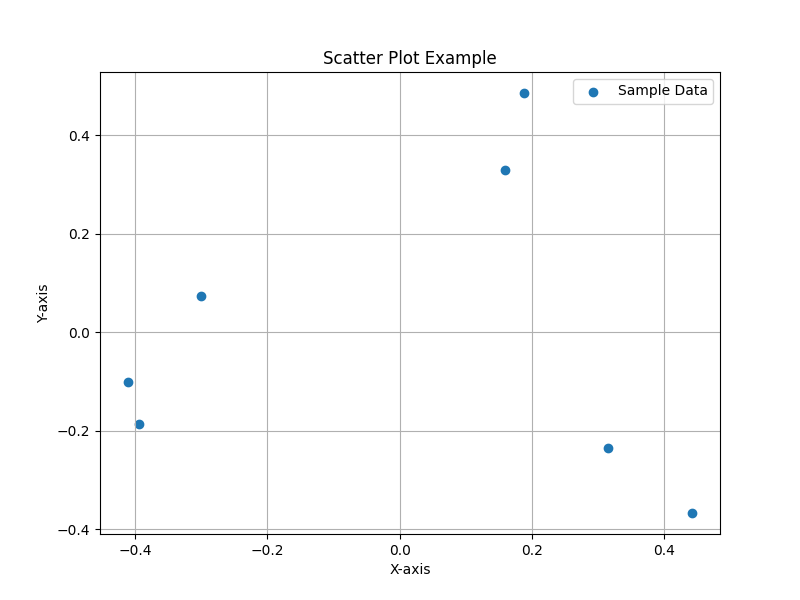

In [29]:
import matplotlib.pyplot as plt
import mplcursors
%matplotlib ipympl

#from utils import plot_2D
#plot_2D(new_values[:,0], new_values[:,1], input_text_lst_news)

#plt.plot(new_values[:,0], new_values[:,1])

plt.figure(figsize=(8, 6))
plt.scatter(new_values[:,0], new_values[:,1], label='Sample Data')
plt.title('Scatter Plot Example')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.grid(True)

# Display the plot
plt.show()


#### Embeddings and Similarity
- Plot a heat map to compare the embeddings of sentences that are similar and sentences that are dissimilar.

In [23]:
in_1 = """He couldn’t desert 
          his post at the power plant."""

in_2 = """The power plant needed 
          him at the time."""

in_3 = """Cacti are able to 
          withstand dry environments.""" 

in_4 = """Desert plants can 
          survive droughts.""" 

input_text_lst_sim = [in_1, in_2, in_3, in_4]


In [31]:
embeddings = []
for input_text in input_text_lst_sim:
    #emb = embedding_model.get_embeddings([input_text])[0].values
    #embeddings.append(emb)
    emb = palm.generate_embeddings(model=model, text=input_text)
    embeddings.append(emb['embedding'])
    
embeddings_array = np.array(embeddings) 


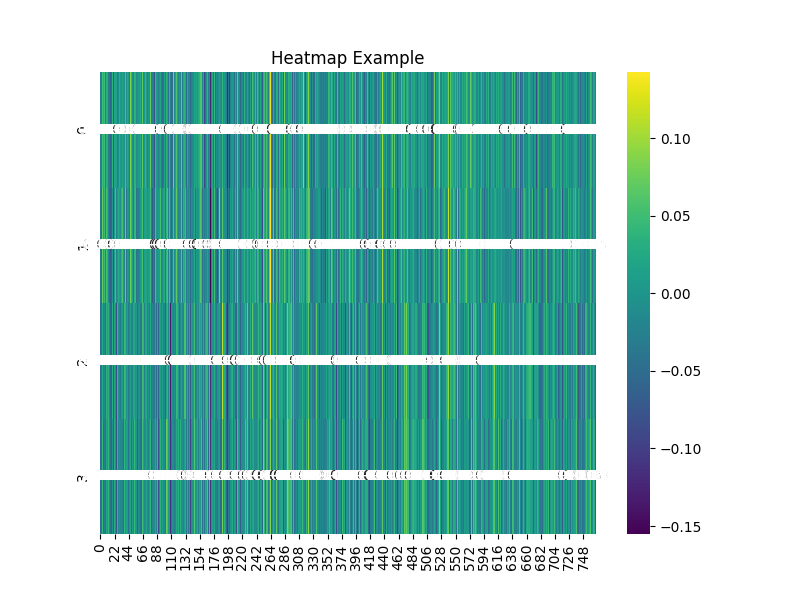

In [34]:
#from utils import plot_heatmap
import seaborn as sns

y_labels = input_text_lst_sim

# Plot the heatmap
#plot_heatmap(embeddings_array, y_labels = y_labels, title = "Embeddings Heatmap")

# Create the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(embeddings_array, annot=True, cmap='viridis')  # 'annot=True' to annotate each cell with its value
plt.title('Heatmap Example')

# Display the plot
plt.show()


Note: the heat map won't show everything because there are 768 columns to show.  To adjust the heat map with your mouse:
- Hover your mouse over the heat map.  Buttons will appear on the left of the heatmap.  Click on the button that has a vertical and horizontal double arrow (they look like axes).
- Left click and drag to move the heat map left and right.
- Right click and drag up to zoom in.
- Right click and drag down to zoom out.

#### Compute cosine similarity
- The `cosine_similarity` function expects a 2D array, which is why we'll wrap each embedding list inside another list.
- You can verify that sentence 1 and 2 have a higher similarity compared to sentence 1 and 4, even though sentence 1 and 4 both have the words "desert" and "plant".

In [35]:
from sklearn.metrics.pairwise import cosine_similarity


In [36]:
def compare(embeddings,idx1,idx2):
    return cosine_similarity([embeddings[idx1]],[embeddings[idx2]])
    

In [37]:
print(in_1)
print(in_2)
print(compare(embeddings,0,1))


He couldn’t desert 
          his post at the power plant.
The power plant needed 
          him at the time.
[[0.80960424]]


In [38]:
print(in_1)
print(in_4)
print(compare(embeddings,0,3))


He couldn’t desert 
          his post at the power plant.
Desert plants can 
          survive droughts.
[[0.48825553]]
